# <center> A Study of Factors related to Hypertension in Adults </center>


The objective of this notebook is to show some of the essential steps of a workflow for building predictive models. The notebook provides a few examples of each step and it is only a very thin slice of what a complete analysis would consist of.

The workflow includes:
1. **Problem Definition**:  A clear definition of the problem enables us to identify the appropriate data to gather and technique(s) to use in order to solve the problem. For many problems this many require background reading, discussion with domain experts, and layered problem specification.
2. **Data Gathering**: We have to know which data to use, where to gather them, and how to make them useful to solve our problem. In many cases, data from multiple sources can provide deeper insights.
3. **Exploratory Data Analysis**: Exploratory data analysis (EDA) is an approach of performing initial investigations on our data. EDA normally has descriptive nature and uses graphical statistics to discover patterns, to identify anomalies, to test hypothesis, and to check assumptions regarding our data.
4. **Data Cleaning and Wrangling**: Raw data are generally incomplete, inconsistent, and contain many errors. Thus, we need to prepare the data for further processing. Data wrangling is the process of cleaning, structuring, and enriching raw data into another format with the intent of making it more appropriate and valuable for a variety of downstream purposes, such as analytics.
5. **Data Modelling**:  Data modelling involves selecting and optiming the machine learning models that generate the best predictive performance based on the data we have.
6. **Prediction**: Once we have developed the best predictive model, we can deploy it to make predictions.



# 1.0. Problem Definition

Hypertension is a major public health problem and important area of research due to its high prevalence and being major risk factor for cardiovascular diseases and other complications. To assess the prevalence of hypertension and its associated factors this notebook analyzes the data from the NHANES datasets (https://www.cdc.gov/nchs/nhanes/index.htm)

We apply the tools of machine learning to predict the factors that are associated with systolic blood pressure in adults.





# **Exercise 3a**

The problem presented is a regression problem: predict an individual person's systolic blood pressure, the pressure of that person's circulating blood during a heartbeat, based on other known data points. The data is from the NHANES dataset, where in two-year cycles the CDC surveys a representative subset of the US population in order to gain a health and nutritional assessment.


The usefulness of this model is questionable for two reasons. The first reason is that measuring a person's blood pressure is cheap, easy, non-invasive, and quick. There is no need to go to the trouble of creating this model because the current solutions are already so simple and widespread. The second reason is that in a majority of healthcare settings it is common for healthcare professionals to measure and record a patients' vital signs at the beginning of a visit. A person's blood pressure is one of those vital signs. This means that a model predicting systolic blood pressure would not be "useful" because blood pressure is already a health statistic people have in their medical histories. A prediction is not needed when the actual numbers already exist.


That said, using this common statistic for model development in the context of teaching Machine Learning is a fantastic idea. Since it is so prevalent, there is ample data to explore and analyze! Let's get to it!


# 2.0. Data Gathering and Import


In [1]:
#Before moving to the next section, we need to import all packages required to do the analysis by calling the following:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## 2.1. Gathering and Importing Data

We import the datasets by calling the following:

In [2]:
import os
import tarfile
import urllib

DOWNLOAD_ROOT = "https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/"
LOCAL_DATA_PATH = os.path.join("datasets", "nhanes") + "/"
FILE_NAME = "P_DEMO.XPT"

def fetch_nhanes_data(file_name=FILE_NAME, nhanes_url=DOWNLOAD_ROOT,  nhanes_path=LOCAL_DATA_PATH):
    os.makedirs(nhanes_path, exist_ok=True)
    xpt_path = os.path.join(nhanes_path, file_name)
    url = nhanes_url + file_name
    urllib.request.urlretrieve(url, xpt_path)

print(LOCAL_DATA_PATH)

datasets/nhanes/


In [3]:
fetch_nhanes_data("P_DEMO.XPT","https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/",LOCAL_DATA_PATH)
fetch_nhanes_data("P_BPXO.XPT","https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/",LOCAL_DATA_PATH)
fetch_nhanes_data("P_BMX.XPT","https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/",LOCAL_DATA_PATH)


In [4]:
# Exercise 3d
fetch_nhanes_data("P_OHXDEN.XPT","https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/",LOCAL_DATA_PATH) #  Oral Health


In [5]:
!ls $LOCAL_DATA_PATH

P_BMX.XPT  P_BPXO.XPT  P_DEMO.XPT  P_OHXDEN.XPT


In [ ]:
demo_df = pd.read_sas(LOCAL_DATA_PATH + "P_DEMO.XPT")
bmx_df = pd.read_sas(LOCAL_DATA_PATH + "P_BMX.XPT")
bpxo_df = pd.read_sas(LOCAL_DATA_PATH + "P_BPXO.XPT")

# added
ohxden_df = pd.read_sas(LOCAL_DATA_PATH + "P_OHXDEN.XPT") #  Oral Health

## 2.2. Exploring Data Structure and Features
Before performing data analysis, we often need to know the structure of our data. Therefore, we perform the following:
- Viewing a small part of our datasets
- Viewing data shape
- Describing the features contained in the datasets


In [ ]:
ohxden_df.head(20)

In [9]:
ohxden_df.shape

(13772, 170)

In [10]:
bmx_df.shape

(14300, 22)

In [11]:
demo_df.shape

(15560, 29)

In [ ]:
bmx_df.head()

In [ ]:
bmx_df.info()

In [ ]:
demo_df.head()

In [ ]:
bpxo_df.describe()

### Keep only the columns that will be used in the analysis

**Exercise 3b and Exercise 3c**

New catagorical variables added:

**'RIDRETH1'** from demo_df - Recode of reported race and Hispanic origin information
**'OHXRCAR'** and **'OHXRCARO'** from ohxden_df - Root Caries and Other non-carious root lesions in the mouth.

New numerical fields added:

**'BPXODI1', 'BPXODI2', and 'BPXODI3'** from bpxo_df - diastolic pressure measurments.

**'INDFMPIR'** from demo_df-  A ratio of family income to poverty guidelines; a float between the values 0 and 5 (inclusive)


** notes on my choices:

RIDRETH1 was chosen because anecdotally I have heard that race is corrolated with various health risks.

OHXRCAR and OHXRCARO were chosen because I have learned through previous work experience that oral health is very much connected with a person's overall health.

INDFMPIR was chosen because anecdotally I have heard that socio economic status plays a very large role in a variety of health risks

The diastolic pressure readings were chosen because I believe that they have a  corrolation with systolic pressure. I actually feel like using them is almost "cheating" because of how corrolated I feel they are. It'll be fun for this assignment regardless.




In [7]:
keep_columns = ['SEQN','RIAGENDR','RIDAGEYR','DMDEDUC2', 'INDFMPIR', 'RIDRETH1']
demo_sub_df = demo_df[keep_columns]
demo_sub_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15560 entries, 0 to 15559
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      15560 non-null  float64
 1   RIAGENDR  15560 non-null  float64
 2   RIDAGEYR  15560 non-null  float64
 3   DMDEDUC2  9232 non-null   float64
 4   INDFMPIR  13359 non-null  float64
 5   RIDRETH1  15560 non-null  float64
dtypes: float64(6)
memory usage: 729.5 KB


In [8]:
keep_columns = ['SEQN', 'BPXOSY1', 'BPXOSY2', 'BPXOSY3', 'BPXODI1', 'BPXODI2', 'BPXODI3']
bpxo_sub_df = bpxo_df[keep_columns]
bpxo_sub_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11656 entries, 0 to 11655
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SEQN     11656 non-null  float64
 1   BPXOSY1  10352 non-null  float64
 2   BPXOSY2  10327 non-null  float64
 3   BPXOSY3  10286 non-null  float64
 4   BPXODI1  10352 non-null  float64
 5   BPXODI2  10327 non-null  float64
 6   BPXODI3  10286 non-null  float64
dtypes: float64(7)
memory usage: 637.6 KB


In [9]:
keep_columns= ['SEQN','BMXWT','BMXHT','BMXBMI']
bmx_sub_df = bmx_df[keep_columns]
bmx_sub_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14300 entries, 0 to 14299
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SEQN    14300 non-null  float64
 1   BMXWT   14075 non-null  float64
 2   BMXHT   13157 non-null  float64
 3   BMXBMI  13137 non-null  float64
dtypes: float64(4)
memory usage: 447.0 KB


In [10]:
keep_columns = ['SEQN', 'OHXRCAR', 'OHXRCARO']  # OHXRCARO
ohxden_sub_df = ohxden_df[keep_columns]
ohxden_sub_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13772 entries, 0 to 13771
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      13772 non-null  float64
 1   OHXRCAR   8008 non-null   float64
 2   OHXRCARO  8008 non-null   float64
dtypes: float64(3)
memory usage: 322.9 KB


### Merge the datatables into a single table

In [11]:
hp_df = demo_sub_df.merge(bpxo_sub_df, how='inner', on='SEQN')
hp_df = hp_df.merge(bmx_sub_df,how="inner", on='SEQN')
hp_df = hp_df.merge(ohxden_sub_df, how="inner", on='SEQN')
hp_df.shape

(11656, 17)

In [32]:
# Note the missing values
hp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11656 entries, 0 to 11655
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      11656 non-null  float64
 1   RIAGENDR  11656 non-null  float64
 2   RIDAGEYR  11656 non-null  float64
 3   DMDEDUC2  8544 non-null   float64
 4   INDFMPIR  10110 non-null  float64
 5   RIDRETH1  11656 non-null  float64
 6   BPXOSY1   10352 non-null  float64
 7   BPXOSY2   10327 non-null  float64
 8   BPXOSY3   10286 non-null  float64
 9   BPXODI1   10352 non-null  float64
 10  BPXODI2   10327 non-null  float64
 11  BPXODI3   10286 non-null  float64
 12  BMXWT     11470 non-null  float64
 13  BMXHT     11462 non-null  float64
 14  BMXBMI    11446 non-null  float64
 15  OHXRCAR   8008 non-null   float64
 16  OHXRCARO  8008 non-null   float64
dtypes: float64(17)
memory usage: 1.6 MB


# 3.0 Exploratory Data Analysis

In [ ]:
hp_df.hist(bins=50, figsize=(20,15))
plt.show()

In [12]:
#hp_sub_df = hp_df[['BMXBMI','BPXOSY', 'RIAGENDR','BMXWT','BMXHT','RIDAGEYR']]
corr_matrix = hp_df.corr()
corr_matrix["BPXOSY1"].sort_values(ascending=False)

BPXOSY1     1.000000
BPXOSY2     0.950386
BPXOSY3     0.939808
BPXODI1     0.674561
BPXODI2     0.637523
BPXODI3     0.626704
RIDAGEYR    0.576196
BMXWT       0.254004
BMXHT       0.250672
BMXBMI      0.208298
RIDRETH1    0.048302
INDFMPIR    0.014652
SEQN       -0.014743
OHXRCAR    -0.094349
RIAGENDR   -0.121924
DMDEDUC2   -0.129074
OHXRCARO   -0.133260
Name: BPXOSY1, dtype: float64

In [13]:
hp_df.isnull().sum()

SEQN           0
RIAGENDR       0
RIDAGEYR       0
DMDEDUC2    3112
INDFMPIR    1546
RIDRETH1       0
BPXOSY1     1304
BPXOSY2     1329
BPXOSY3     1370
BPXODI1     1304
BPXODI2     1329
BPXODI3     1370
BMXWT        186
BMXHT        194
BMXBMI       210
OHXRCAR     3648
OHXRCARO    3648
dtype: int64

In [38]:
# feat_desc = pd.DataFrame({'Description': ['Respondent Sequence Number',
#                                           'The gender of the passenger',
#                                           'Age in years at screening',
#                                           'The Education Level Adults 20+',
#                                           'Systolic 1st Oscillometric reading',
#                                           'Systolic 2nd Oscillometric reading',
#                                           'Systolic 3rd Oscillometric reading',
#                                           'Weight (Kg)',
#                                           'Standing Height (cm)',
#                                           'Body Mass Index (Kg/m**2)'],
#                           'Values': [hp_df[i].unique() for i in hp_df.columns],
#                           'Number of unique values': [len(hp_df[i].unique()) for i in hp_df.columns]},
#                           index = hp_df.columns)

# feat_desc

In [ ]:
plt.figure(figsize=(13,10))

hp_df['age_groups'] = pd.cut(hp_df['RIDAGEYR'], bins=range(20,90,8))

# Creating a bar chart of ticket class (Pclass) vs probability of survival (Survived)
ax1 = plt.subplot(221)
g1 = sns.barplot(x='age_groups', y='BPXOSY2', data=hp_df, color='seagreen')
plt.ylabel('Systolic Pressure')
plt.xlabel('Age')
plt.title('Age and Systolic Pressure', size=13)

hp_df = hp_df.drop('age_groups', axis=1)
# Creating a bar chart of ticket class (Pclass) and gender (Sex) vs probability of survival (Survived)
ax2 = plt.subplot(222)
g2 = sns.barplot(x='RIAGENDR', y='BPXOSY2', data=hp_df, palette='BuGn_r')
plt.ylabel('Systolic Pressure')
plt.xlabel('Gender')
ax2.set_xticklabels(['Male', 'Female'])
plt.title('Gender and Systolic Pressure', size=13)


plt.subplots_adjust(hspace = 0.4, wspace = 0.3)

plt.show()

**Exercise 3f**

Using the graphs you provided to look at the new data I added was very helpful.

Specifically:

* the hist() of INDFMPIR. Now I see that I should probably chop off the 5s.


* the corolation matrix shows me that yes there is a corolation between systolic and diastolic pressure.


* the corolation matrix shows me that yes there is a corolation (a weak negative one) between systolic pressure and oral health. I think the corrolation is negative because of how the labels are currently being interpreted. After some cleaning I think it'll be positive, and maybe stronger when I one-hot encode it the way I'm currently thinking.


In addition to using the graphs YOU provided, here are graphs showing the corolation between systolic pressure and weight and height: (it seems like there isn't much corrolation between weight and blood pressure? That is the opposite of what I was expecting.)


In [ ]:
hp_df['BMXHT'].head(10)

/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


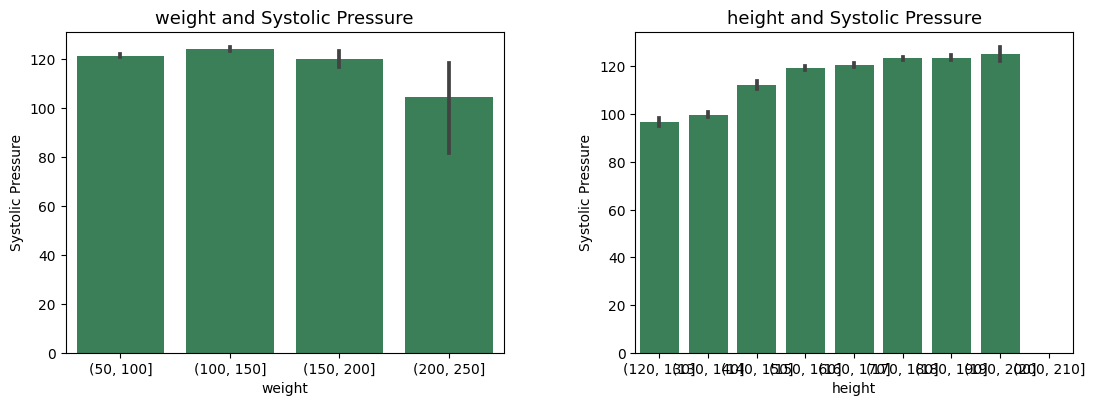

In [15]:
plt.figure(figsize=(13,10))

hp_df['weight_groups'] = pd.cut(hp_df['BMXWT'], bins=range(50,300,50))

# Creating a bar chart of ticket class (Pclass) vs probability of survival (Survived)
ax1 = plt.subplot(221)
g1 = sns.barplot(x='weight_groups', y='BPXOSY2', data=hp_df, color='seagreen')
plt.ylabel('Systolic Pressure')
plt.xlabel('weight')
plt.title('weight and Systolic Pressure', size=13)

hp_df = hp_df.drop('weight_groups', axis=1)
# Creating a bar chart of ticket class (Pclass) and gender (Sex) vs probability of survival (Survived)
hp_df['height_groups'] = pd.cut(hp_df['BMXHT'], bins=range(120,220,10))

# Creating a bar chart of ticket class (Pclass) vs probability of survival (Survived)
ax1 = plt.subplot(222)
g1 = sns.barplot(x='height_groups', y='BPXOSY2', data=hp_df, color='seagreen')
plt.ylabel('Systolic Pressure')
plt.xlabel('height')
plt.title('height and Systolic Pressure', size=13)

plt.subplots_adjust(hspace = 0.4, wspace = 0.3)

plt.show()

In [27]:
hp_df = hp_df.drop('height_groups', axis=1)

# 4.0 Data Cleaning and Wrangling

### We do some of the cleaning and attribute adding now before the split

**Exercise 3g**

Here I made it so the available bp numbers are averaged together and those values are saved in seperate columns. I edited bp_add_attributes() so that this happens for both Systolic and Diastolic readings.

Here I also cut off the rows where the INDFMPIR values were above 5. In the no_rich_people() function.

I added a drop_sbp_NaNs() function to remove all rows with Nan values in BPXOSY

Here I also drop all the rows with missing values in the Oral Health data OHXRCAR and OHXRCARO using the function oral_health_cleaning()

In [94]:
def bp_add_attributes(hp_df):
  # finding and averaging the available bp data, and saving those values into new columns
  # BPXOSY is for systoli bp data
  # BPXODI is for diastolic data
    if 'BPXOSY' not in hp_df.columns:
         hp_df['BPXOSY']=  hp_df[['BPXOSY1', 'BPXOSY2', 'BPXOSY3']].mean(axis=1, skipna=True)
    if 'BPXODI' not in hp_df.columns:
         hp_df['BPXODI']=  hp_df[['BPXODI1', 'BPXODI2', 'BPXODI3']].mean(axis=1, skipna=True)

    return hp_df

In [95]:
def bp_trim_rows(hp_df):
    # We are only interested in adults, so let's drop all individuals with an age less than 20
    hp_df = hp_df[hp_df['RIDAGEYR'] >= 20]
    return hp_df

In [96]:
def drop_sbp_NaNs(hp_df):
   hp_df = hp_df.dropna(subset=['BPXOSY'])  # dropping all NaN from the labels
   return hp_df

In [97]:
def bp_drop_columns(hp_df):
    # We do not need the seqn now (only needed for the merge)
    if 'SEQN' in hp_df.columns:
        hp_df = hp_df.drop("SEQN",axis=1)
    # the bp numbers have been averaged
    if 'BPXOSY1' in hp_df.columns:
        hp_df = hp_df.drop('BPXOSY1',axis=1)
    if 'BPXOSY2' in hp_df.columns:
        hp_df = hp_df.drop('BPXOSY2',axis=1)
    if 'BPXOSY3' in hp_df.columns:
        hp_df = hp_df.drop("BPXOSY3",axis=1)
    if 'BPXODI1' in hp_df.columns:
        hp_df = hp_df.drop('BPXODI1',axis=1)
    if 'BPXODI2' in hp_df.columns:
        hp_df = hp_df.drop('BPXODI2',axis=1)
    if 'BPXODI3' in hp_df.columns:
        hp_df = hp_df.drop("BPXODI3",axis=1)

    return hp_df


In [98]:
def bp_add_trim_drop(hp_df):
    hp_df = bp_trim_rows(hp_df)
    hp_df = bp_add_attributes(hp_df)
    hp_df = bp_drop_columns(hp_df)
    hp_df = drop_sbp_NaNs(hp_df)

    return hp_df

In [99]:
def no_rich_people(hp_df):
  # this is going to cut off participants whose income is 5 times the povberty line or greater.
  # The data caps the catagory at 5 time the poverty line and lumps everyone above that into 5.
  # I feel a little weird about doing this because that's almost 2000 data points...
  # but they're all lumped together in one big column, so I don't think I have a choice here..
  # I think that if I weren't crunched for time I would try and find different data to add
  hp_df = hp_df[hp_df['INDFMPIR'] < 5]
  return hp_df

In [100]:
hp_df = bp_add_trim_drop(hp_df)
hp_df.head()

,RIAGENDR,RIDAGEYR,DMDEDUC2,INDFMPIR,RIDRETH1,BMXWT,BMXHT,BMXBMI,OHXRCAR,OHXRCARO,BPXOSY,BPXODI
4,1.0,36.0,4.0,0.83,3.0,74.3,184.2,21.9,2.0,2.0,113.666667,67.333333
8,1.0,76.0,5.0,3.61,3.0,83.3,177.1,26.6,2.0,2.0,139.333333,72.666667
15,1.0,58.0,3.0,1.60,2.0,86.0,167.8,30.5,2.0,2.0,138.000000,97.000000
16,1.0,44.0,3.0,0.02,3.0,99.4,181.6,30.1,1.0,2.0,128.666667,83.666667
26,1.0,47.0,1.0,1.38,5.0,67.9,166.2,24.6,1.0,1.0,115.000000,68.333333


In [101]:
hp_df.shape

(4860, 12)

In [102]:
hp_df = no_rich_people(hp_df)
hp_df.shape

(4860, 12)

In [ ]:
#Checking to see if my no_rish_people() function did what I wanted it to do.
# and it did, good.

hp_df.hist(bins=50, figsize=(20,15))
plt.show()

In [104]:
def oral_health_cleaning(hp_df):
  hp_df = hp_df.dropna(subset=['OHXRCAR', 'OHXRCARO'])
  return hp_df


In [105]:
hp_df = oral_health_cleaning(hp_df)
hp_df.shape

(4860, 12)

### Now split into training and test data sets

In [106]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(hp_df, test_size=0.2, random_state=42)

In [107]:
# have some background information that leads us to believe male and female heart rates are different
#  so we make sure that we have even split across train and test
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(hp_df, hp_df['RIAGENDR']):
        strat_train_set = hp_df.iloc[train_index]
        strat_test_set = hp_df.iloc[test_index]

In [108]:
bp_train_X = strat_train_set.drop("BPXOSY", axis=1)
bp_train_y = strat_train_set["BPXOSY"].copy()
bp_train_y.isnull().sum()

0

In [109]:
bp_train_X.head()

,RIAGENDR,RIDAGEYR,DMDEDUC2,INDFMPIR,RIDRETH1,BMXWT,BMXHT,BMXBMI,OHXRCAR,OHXRCARO,BPXODI
9031,2.0,60.0,3.0,2.40,2.0,82.5,152.6,35.4,2.0,1.0,87.333333
6602,1.0,59.0,3.0,0.88,3.0,70.3,168.7,24.7,2.0,2.0,79.666667
11550,1.0,63.0,2.0,1.40,3.0,71.4,165.2,26.2,2.0,2.0,82.333333
5073,2.0,37.0,4.0,1.99,1.0,100.2,159.1,39.6,2.0,2.0,62.000000
9921,1.0,71.0,3.0,1.66,3.0,56.6,175.4,18.4,2.0,2.0,70.000000


### set missing values of numerical data to the median

In [110]:
# these are categorical fields, so we need to remove them to do column calculations

columns_to_remove = ["RIAGENDR", "OHXRCAR", "OHXRCARO", "RIDRETH1"]

bp_num = bp_train_X.drop(columns= columns_to_remove)


In [111]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [112]:

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
        ])
#bp_num_tr = num_pipeline.fit_transform(bp_num)

In [113]:
bp_train_X.head()

,RIAGENDR,RIDAGEYR,DMDEDUC2,INDFMPIR,RIDRETH1,BMXWT,BMXHT,BMXBMI,OHXRCAR,OHXRCARO,BPXODI
9031,2.0,60.0,3.0,2.40,2.0,82.5,152.6,35.4,2.0,1.0,87.333333
6602,1.0,59.0,3.0,0.88,3.0,70.3,168.7,24.7,2.0,2.0,79.666667
11550,1.0,63.0,2.0,1.40,3.0,71.4,165.2,26.2,2.0,2.0,82.333333
5073,2.0,37.0,4.0,1.99,1.0,100.2,159.1,39.6,2.0,2.0,62.000000
9921,1.0,71.0,3.0,1.66,3.0,56.6,175.4,18.4,2.0,2.0,70.000000


In [114]:
num_attribs = list(bp_num)
cat_attribs = ["RIAGENDR", "OHXRCAR", "OHXRCARO", "RIDRETH1"]
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
        ])
bp_prepared = full_pipeline.fit_transform(bp_train_X)
bp_prepared.shape
# print(len(num_attribs))
# print(num_attribs)

(3888, 20)

In [115]:
# bp_prepared is in a numpy array. Sometimes it is useful to have the data in a dataframe, so let's build one
# we do not use this dataframe for the rest of the notebook, but you may find it useful
column_names = num_attribs.copy()
column_names.append('Male')
column_names.append('Female')
bp_prepared_df = pd.DataFrame(bp_prepared) # , columns=column_names)
bp_prepared_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.638862,-0.437340,0.220164,-0.098895,-1.452314,0.653779,1.071705,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.581617,-0.437340,-0.951234,-0.623435,0.188185,-0.739639,0.410075,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.810595,-1.321112,-0.550492,-0.576140,-0.168445,-0.544300,0.640207,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-0.677761,0.446432,-0.095805,0.662117,-0.790001,1.200728,-1.114551,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.268551,-0.437340,-0.350122,-1.212467,0.870877,-1.560062,-0.424155,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


# 5.0 Data Modeling

### Linear regression

In [116]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(bp_prepared, bp_train_y)

LinearRegression()

In [119]:
#some_data = X.iloc[:5]
some_data = bp_prepared[:5]
some_labels = bp_train_y.iloc[:5]
print("Predictions:", lin_reg.predict(some_data))
print("Labels:", list(some_labels))

# baseline: Predictions: [128.90338044 134.5653923  113.10728897 113.25663211 133.1016176 ]
# baseline: Labels: [140.33333333333334, 157.33333333333334, 108.66666666666667, 94.0, 140.33333333333334]


# NEW
# Predictions: [140.26471781 137.02934711 142.09954324 101.95255294 133.80435898]
# Labels: [162.0, 127.0, 130.0, 98.33333333333333, 133.66666666666666]

Predictions: [140.26471781 137.02934711 142.09954324 101.95255294 133.80435898]
Labels: [162.0, 127.0, 130.0, 98.33333333333333, 133.66666666666666]


In [118]:
from sklearn.metrics import mean_squared_error
systolic_predictions = lin_reg.predict(bp_prepared)
lin_mse = mean_squared_error(bp_train_y, systolic_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

# baseline: 17.189131895477804

# NEW
# 12.096309127756157

12.096309127756157

### Random Forest

**Exercise 3e**

In [122]:
from sklearn.ensemble import RandomForestRegressor
rand_forest = RandomForestRegressor()
rand_forest.fit(bp_prepared, bp_train_y)

RandomForestRegressor()

In [123]:
systolic_predictions_forest = rand_forest.predict(bp_prepared)
forest_mse = mean_squared_error(bp_train_y, systolic_predictions_forest)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

4.350044326736901

### Cross Validation (todo)

**Exercise 3h**

In [127]:
from sklearn.model_selection import cross_val_score

#random forest model
forest_cross_val_scores = cross_val_score(rand_forest, bp_prepared, bp_train_y,
                         scoring="neg_mean_squared_error", cv=10)
rmse_forest_score = np.sqrt(-forest_cross_val_scores)
rmse_forest_score

array([11.33658422, 11.0983396 , 12.23743083, 11.30891328, 12.18512299,
       11.96295861, 10.89374288, 11.19114134, 11.8535032 , 12.30707468])

# 6.0 Prediction

### Evaluate on the test set : only done at the end of all modeling (once !)

In [128]:
X_test = strat_test_set.drop("BPXOSY", axis=1)
y_test = strat_test_set["BPXOSY"].copy()

In [129]:
bp_prepared = full_pipeline.fit_transform(X_test)

In [131]:
from sklearn.metrics import mean_squared_error
systolic_predictions = lin_reg.predict(bp_prepared)
lin_mse = mean_squared_error(y_test, systolic_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse


12.169054246803524